In [4]:
# get model
from torchvision import models
import sys, torch
import matplotlib.pyplot as plt

sys.path.append('/accounts/projects/vision/chandan/max-activation-interpretation-pytorch/')
import max_act, visualize_ims
device = 'cuda' if torch.cuda.is_available() else 'cpu'


model = models.vgg16(pretrained=True).to(device).eval()
model_type='vgg' # alexnet, vgg

In [2]:
im = torch.zeros(1, 3, 224, 224, requires_grad=True, device=device)
ims_opt, losses = max_act.maximize_im_simple(model, im, num_iters=int(51), lr=1e-2, 
                lambda_pnorm=0, # lambda_tv=1e-2,
                device='cuda', save_freq=50, class_num=0)

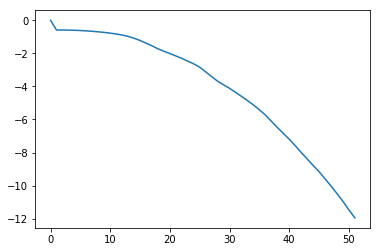

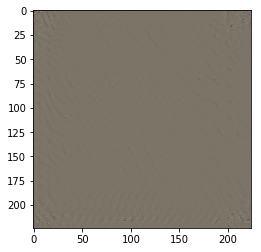

In [5]:
imf = visualize_ims.im_to_np(ims_opt[-1]) #ims_opt[0].cpu().detach().numpy().squeeze()
plt.plot(losses)
plt.show()

plt.imshow(imf) #.transpose((1, 2, 0)))
plt.show()